<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**1. Задание**

**Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.**

In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg'
plt.style.use('bmh')

In [2]:
# определяем x, y и n 
zp = x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(zp)

вычисляем коэффициент регрессии $a$ и $b$ по формулам:
$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$

$$a = \overline{y} - b \cdot {\overline{x}}.$$

In [3]:
b = (np.mean(x*y)-np.mean(x)*np.mean(y))/(np.mean(x**2)-np.mean(x)**2)
a = np.mean(y)-b*np.mean(x)
print(f'a = {np.round(a, 4)}\nb = {np.round(b, 4)}')

a = 444.1774
b = 2.6205


$\Rightarrow$ уравнение регрессии с intersept имеет вид:
$$y = 444.1774 + 2.6205 \cdot x$$

находим коэффициент корреляции по формуле:

$$r_{xy} = \frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})} {\sqrt{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2 \cdot {\sum\limits_{i=1}^{n} (y_i - \overline{y})^2}}} = b \cdot {\frac{\sigma_x}{\sigma_y}}$$

In [4]:
r = b * np.std(x) / np.std(y)
np.round(r, 4)

0.8875

видно, что $r \rightarrow 1$ и $r \gt 0.5$

получим коэффициент детерминации по формуле:
$$R^2 = r^{2}_{xy}$$

In [5]:
R2 = r**2
np.round(R2, 4)

0.7876

из $R^2$ видно, что 78.8% вариации поведенческого кредитного скоринга ($y$) объясняется вариацией величины заработной платы заемщиков банка ($x$), а это значит, что остальные 21.2% вариации скоринга зависят от чего-то другого и для их анализа нам надо бы брать не величину зарплаты, а какие-то другие фичи

знаем $a$, $b$ и зарплаты $x$ - можем по формуле $y = a + bx$ вывести предсказание скоринга

In [6]:
y_pred = a+b*x
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

по предсказанным ценам найдём ошибку аппроксимации по формуле:
$$\overline{A} = \frac{1}{n} \sum\limits_{i=1}^{n} \Bigl |{{\frac{y_i - \hat{y}_i}{y_i}} \Bigr |} \cdot{100\%}$$

In [7]:
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
print(f'A_mean = {int(np.round(A_mean))}%')

A_mean = 11%


$\overline{A}>10\% \Rightarrow$ теоретические значения не близки к тем, которые выдаёт модель линейной регрессии, что может говорить нам о "не очень красивой" модели. Однако линейную регрессию по ней мы всё равно будет отрабатывать до конца, так как у нас $r \neq 0$ и $r \rightarrow 1$

оценим значимость уравнения регрессии с помощью **F-критерия Фишера**. Сначала найдём расчётное значение по формуле:
$$F_{факт} = \frac{r_{xy}^{2} \cdot (n - 2)}{(1 - r_{xy}^{2})}$$

In [8]:
F_fact = (r**2 * (n - 2)) / (1 - r**2)
np.round(F_fact, 4)

29.6716

а для поиска табличного $F_{кр}$ при 5% уровне значимости и степенях свободы: 

$k_1=1$ (так как у нас парная линейная регрессия) 

$k_2= n - k_1 - 1 = 10 - 2 = 8$

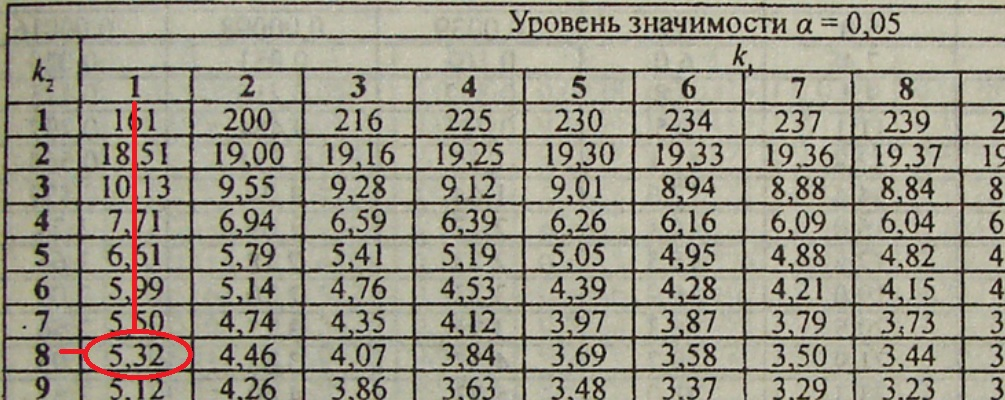

In [9]:
Image('https://i.ibb.co/2sXQdjK/Fishera.jpg')

$F_{кр} = 5.32$

сравниваем:

$F_{факт} = 29.67 > F_{кр} = 5.32 \Rightarrow$ уравнение регрессии статистически значимо.

переходим к оценке статистической значимости самих параметров регресии $a$ и $b$. Делаем это при помощи **t-статистики Стьюдента**

Для находжения расчётных $t_a$ и $t_b$ нам нужно будет найти случайные ошибки $m_a$ и $m_b$, для поиска которых, в свою очередь, нужно определить стандартную ошибку $S_{ост}$

$S_{ост}$ находим по формуле:
$$S_{ост} = \sqrt{\frac{\sum\limits_{i=1}^{n}(y_i - \hat{y}_i)^2}{n - 2}}$$

In [10]:
s_residual = np.sqrt(np.sum((y - y_pred)**2) / (n - 2))
print(f's_residual = {np.round(s_residual, 4)}')

s_residual = 89.9334


$m_a$ и $m_b$ находим так:
$$m_a  = S_{ост} \cdot {\frac{\sqrt{\sum{x^2}}}{n \cdot {\sigma_x}}}$$
$$m_b = \frac{S_{ост}}{\sigma_x \cdot{\sqrt{n}}}$$

In [11]:
m_a = s_residual * np.sqrt(np.sum(x ** 2)) / (n * np.std(x))
m_b = s_residual / (np.std(x) * np.sqrt(n))
print(f'm_a = {np.round(m_a, 4)}\nm_b = {np.round(m_b, 4)}')

m_a = 56.4665
m_b = 0.4811


тогда $t_a$ и $t_b$: 
$$t_a = \frac{a}{m_a}$$ 
$$t_b = \frac{b}{m_b}$$

In [12]:
t_a = a / m_a
t_b = b / m_b
print(f't_a = {np.round(t_a, 4)}\nt_b = {np.round(t_b, 4)}')

t_a = 7.8662
t_b = 5.4472


а для поиска табличного $t_{кр}$: 

1)находим число степеней свободы $df$: 

$df=n-m-1=10-2=8$ (где m - число признаков) 

2) определяем уровень свободы $\alpha$ в $5\%$:

$\alpha = 0.05$

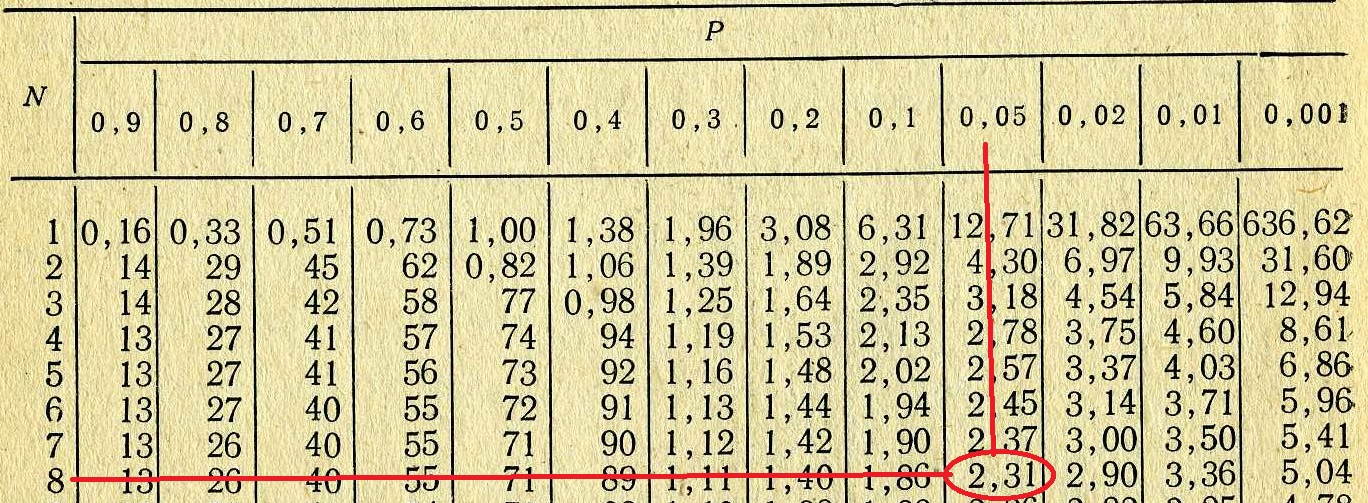

In [13]:
Image('https://i.ibb.co/8YFXWwR/Styudenta.jpg')

$t_{кр} = 2.31$

сравниваем:

$t_a = 7.87 > t_{кр} = 2.31$ 

$t_b = 5.45 > t_{кр} = 2.31$

$\Rightarrow$ параметры a и b статистически значимы.

для нахождения доверительных интервалов $\gamma$ для параметров $a$ и $b$ нужно определить предельную ошибку для каждого показателя $\Delta$, делается это по формулам:
$$\Delta_a = t_{кр} \cdot m_a$$ 
$$\Delta_b = t_{кр} \cdot m_b$$

In [14]:
t_cr = 2.31
delta_a = t_cr * m_a
delta_b = t_cr * m_b
print(f'delta_a = {np.round(delta_a, 4)}\ndelta_b = {np.round(delta_b, 4)}')

delta_a = 130.4376
delta_b = 1.1113


тогда доверительные интервалы:
$$\gamma_a = a \mp \Delta_a$$ 
$$\gamma_b = b \mp \Delta_b.$$

In [15]:
gamma_a_min = a - delta_a
gamma_a_max = a + delta_a
gamma_b_min = b - delta_b
gamma_b_max = b + delta_b
print(f'gamma_a -> [{gamma_a_min}; {gamma_a_max}]\ngamma_b -> [{gamma_b_min}; {gamma_b_max}]')

gamma_a -> [313.7397479822853; 574.6149666664339]
gamma_b -> [1.5092376243700454; 3.7318401404354846]


Вывод: с вероятностью в $95\%$ пареметры $a$ и $b$, находясь в указанных границах, являются статистически значимыми и отличны от нуля

для графика соберём $x$, $y$, $y_{pred}$ в DataFrame

In [16]:
df = pd.DataFrame({'x': x, 'y': y, 'y_pred': y_pred}, columns=['x', 'y', 'y_pred'])
df = df.sort_values('x')
df.head(3)

,x,y,y_pred
0,35,401,535.896218
4,40,459,548.998913
1,45,574,562.101607


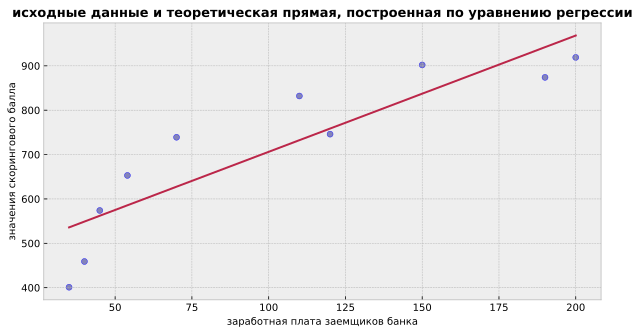

In [17]:
plt.figure(figsize=(10, 5))
plt.scatter(df['x'], df['y'], edgecolors='b', alpha=0.8, c='#6868AC')
plt.plot(df['x'], df['y_pred'], color='#BB2649')
plt.xlabel('заработная плата заемщиков банка', fontsize=10)
plt.ylabel('значения скорингового балла', fontsize=10)
plt.title(f'исходные данные и теоретическая прямая, построенная по уравнению регрессии', fontsize=13, fontweight='bold');

**Вывод:** график соответствует вычислениям по проведённому анализу

_____________
_____________

**найти вес b без intersept можно по формуле метода наименьших квадратов:**
$$\overrightarrow{b} = (X^T X)^{-1}X^T\overrightarrow{y}$$

In [18]:
X = x.reshape(n, 1)
y = y.reshape(n, 1)
w = (np.linalg.inv(X.T @ X) @ X.T @ y)
print(f'вес b без intersept = {np.round(w[0][0], 4)}')

вес b без intersept = 5.8898


$\Rightarrow$ уравнение регрессии с intersept имеет вид:
$$y = 5.8898 \cdot x$$

тогда $y =$ 

In [19]:
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [20]:
y_pred = X @ w
y_pred

array([[ 206.1437147 ],
       [ 265.04191891],
       [1119.06587983],
       [1177.96408403],
       [ 235.59281681],
       [ 412.28742941],
       [ 318.05030269],
       [ 883.47306302],
       [ 706.77845042],
       [ 647.88024621]])

**2. Задание**

**Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).**

в цикле с шагом обучения Learning Rate ($\eta$) = 1e-5 находим значение градиентного спуска и, вычетаем его из b

цикл останавливается тогда, когда разница между $b$ и $b - (b\cdotградиент)$ составит $< 0,0001$ 

In [21]:
def gradient_descent_without_intersept(X, y, eta=1e-5):
    iteration, b = 0, 0.1
    while True:
        iteration += 1
        b_ = b
        b -= eta * (2/len(y)) * np.sum((b * X - y) * X)
        if b - b_ < 0.0001:
            print(f'b = {np.round(b, 4)}\nитераций: {iteration}')
            break

In [22]:
gradient_descent_without_intersept(zp, ks)

b = 5.8896
итераций: 32


**3. Задание**

**Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).**

для intersept и slope своя скорость обучения, цикл останавливается по условию когда $(b0 - (b0-b0'))$ и $(b1 - (b1-b1'))<0,0001$

In [23]:
def gradient_descent_with_intersept(X, y, eta_1=1e-06, eta_2=1e-02):
    a, b, iteration = 1, 1, 0
    while True:
        iteration += 1
        a_, b_ = a, b
        a -= eta_2 * (2/len(y)) * np.sum(a + b * X-y)
        b -= eta_1 * (2/len(y)) * np.sum((a + b * X-y) * X)

        if (a - a_ < 0.0001) and (b - b_ < 0.0001):
            print(f'a = {np.round(a, 4)}\nb = {np.round(b, 4)}\nитераций: {iteration}')
            break

In [24]:
gradient_descent_with_intersept(zp, ks)

a = 444.1461
b = 2.6208
итераций: 2718


**доп**

**В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?**

- до нас не было анализа генеральной совокупности - критерием оценки будет критерий $t$ Стьюдента из таблицы Стьюдента

- до нас был анализ генеральной совокупности - критерием оценки будет критерий Фишера $Z$ из таблицы распределения Лапласа для $Z < 0$ при работе с доверительным интервалом и для $Z>0$ проверки гипотез